
# 1D Kalman Filter

## Problem Setup
- True object moves in **1D**
- We receive **noisy position measurements**
- Goal: **estimate the true position over time** using a Kalman Filter



## Imports
We use:
- **NumPy** for numerical and matrix operations
- **Matplotlib** for visualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation Parameters
We simulate an object moving with **constant velocity** in 1D.

In [2]:
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step

## Generate True State and Noisy Measurements
- `true_positions` → ground truth (unknown in real life)
- `measurements` → noisy sensor readings

In [3]:
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)

## Kalman Filter Initialization
We initialize:
- State estimate
- Uncertainty
- Model matrices
- Noise values

In [5]:
# Initial state estimate (position only)
x_est = np.array([[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])

## Kalman Filter Loop
Each iteration performs:
1. Prediction
2. Update

In [6]:
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())

## Visualization
You should observe:
- Noisy measurements
- Smooth Kalman estimate
- Estimate closely following true position

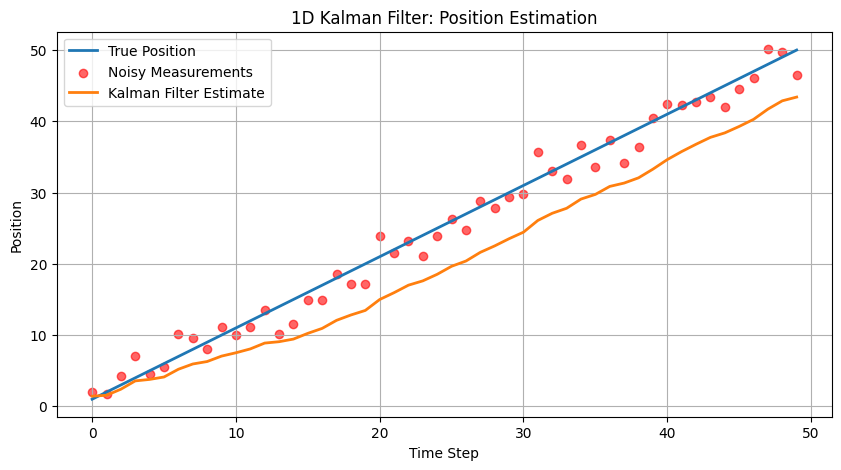

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()

# **Parameter Exploration**

In [8]:
def run_kalman_filter(
    measurements,
    Q_value=0.1,
    R_value=4.0,
    P0=10.0,
    x0=0.0
):

    x_est = np.array([[x0]])
    P = np.array([[P0]])

    F = np.array([[1.0]])
    H = np.array([[1.0]])
    Q = np.array([[Q_value]])
    R = np.array([[R_value]])

    estimates = []

    for z in measurements:
        # prediction
        x_pred = F @ x_est
        P_pred = F @ P @ F.T + Q

        # update
        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)
        y = np.array([[z]]) - H @ x_pred

        x_est = x_pred + K @ y
        P = (np.eye(1) - K @ H) @ P_pred

        estimates.append(x_est.item())

    return estimates

In [12]:
def plot_with_original(new_estimate, new_label, title):
    plt.figure(figsize=(10, 5))

    plt.plot(true_positions, label="True Position", linewidth=2)
    plt.scatter(range(n_steps), measurements,
                label="Noisy Measurements", color="red", alpha=0.4)

    # plotting the original graph as per the code you guys gave
    plt.plot(estimates, label="Original line", linewidth=2)

    # plotting the newer values
    plt.plot(new_estimate, label=new_label, linewidth=2)

    plt.xlabel("Time Step")
    plt.ylabel("Position")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

## Increasing measurement noise R

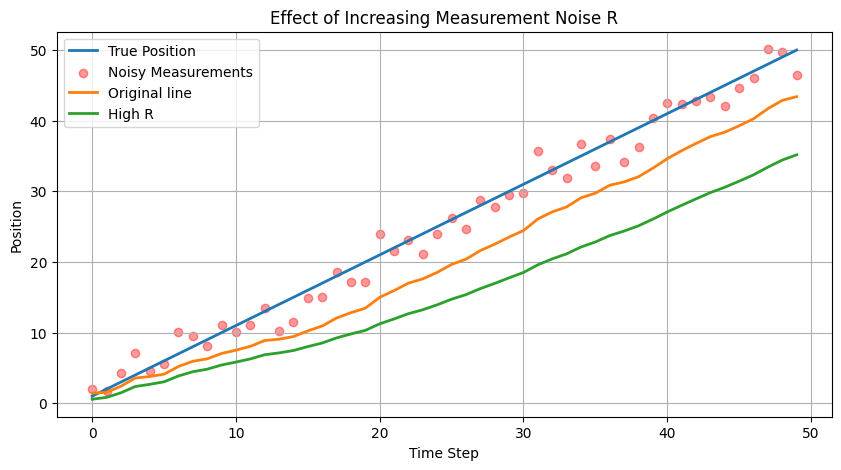

In [13]:
est_high_R = run_kalman_filter(
    measurements,
    R_value=25.0
)

plot_with_original(
    est_high_R,
    "High R",
    "Effect of Increasing Measurement Noise R"
)

### **Observation**
The Kalman estimate becomes noticeably smoother but in this case the deviation from the true value has increased
### **Reasoning**
A larger R reduces the Kalman gain, so the filter trusts the prediction model more than the data it obtains from measurements

## Increasing process noise Q

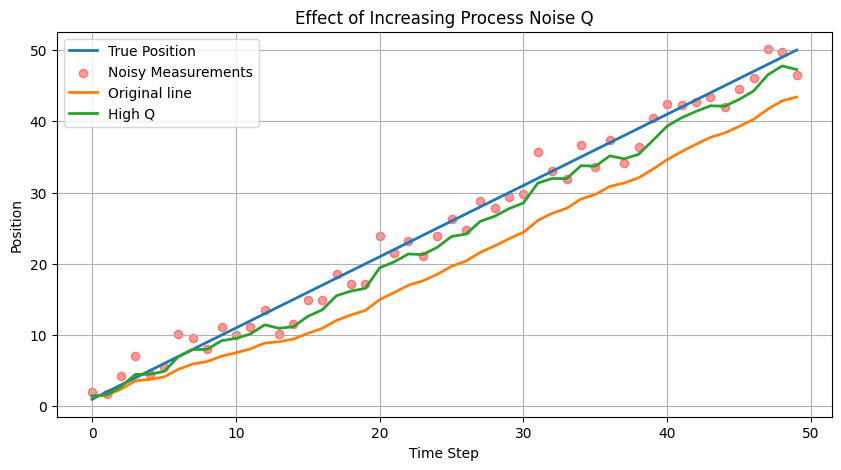

In [14]:
est_high_Q = run_kalman_filter(
    measurements,
    Q_value=1.0
)

plot_with_original(
    est_high_Q,
    "High Q",
    "Effect of Increasing Process Noise Q"
)

### **Observation**
The Kalman estimate follows the measurements more closely and shows increased responsiveness to fluctuations.
### **Reasoning**
A larger Q increases uncertainty in the system model, which increases the Kalman gain and places more weight on measurement updates.

## Starting with a very small initial uncertainty P

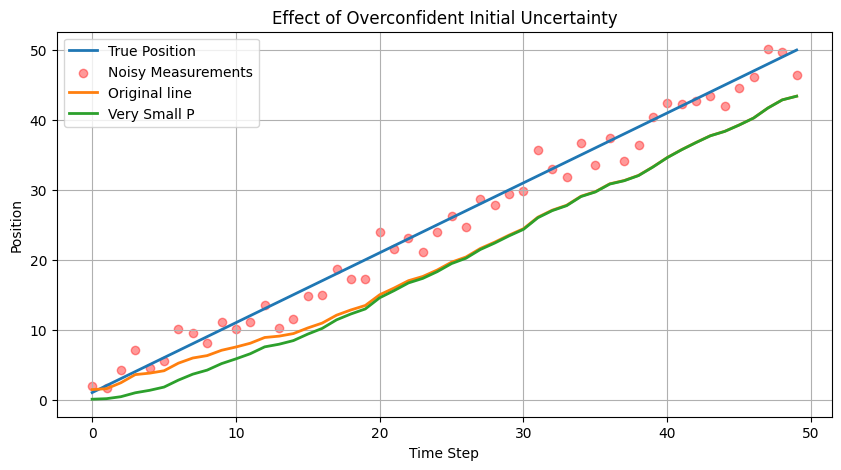

In [15]:
est_small_P = run_kalman_filter(
    measurements,
    P0=0.001
)

plot_with_original(
    est_small_P,
    "Very Small P",
    "Effect of Overconfident Initial Uncertainty"
)

### **Observation**
The filter adapts slowly in the initial time steps but soon coincides with the original line where no initial uncertainty was taken, so yes it adapts well
### **Reasoning**
Although a very small P makes the filter initially overconfident in its starting estimate, the accumulation of measurement updates increases the effective uncertainty, allowing the filter to adapt and converge to the same trajectory as the original filter.

## Starting with a very wrong initial state

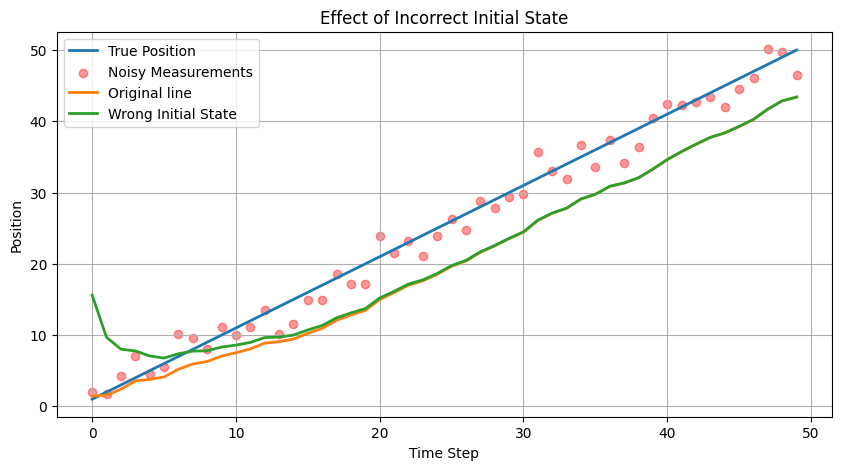

In [16]:
est_wrong_x0 = run_kalman_filter(
    measurements,
    x0=50.0
)

plot_with_original(
    est_wrong_x0,
    "Wrong Initial State",
    "Effect of Incorrect Initial State"
)

### **Observation**
The estimate initially deviates significantly from the true trajectory but converges over time
### **Reasoning**
Repeated measurement updates gradually correct the poor initial estimate, allowing the filter to recover completely even when it is very far off initially

# **Coding Extensions**

## Extending the state to position + velocity




In [18]:
# making the filter 2d taking inspiration from the code you gave to us

x_est = np.array([[0.0],
                  [0.0]])


P = np.array([[10.0, 0.0],
              [0.0, 10.0]])

dt = 1.0


F = np.array([[1.0, dt],
              [0.0, 1.0]])


H = np.array([[1.0, 0.0]])

Q = np.array([[0.1, 0.0],
              [0.0, 0.1]])

R = np.array([[measurement_noise_std ** 2]])

kf_positions = []
pred_only_positions = []


## Tracking an object with changing velocity

In [19]:
true_positions_ext = []
true_velocities_ext = []

position = 0.0
velocity = 1.0

## Adding random acceleration to the true motion

In [20]:
measurements_ext = []

acc_noise_std = 0.2

for _ in range(n_steps):
    # Random acceleration
    acceleration = np.random.normal(0, acc_noise_std)

    # Update true motion
    velocity += acceleration * dt
    position += velocity * dt

    true_positions_ext.append(position)
    true_velocities_ext.append(velocity)

    # Noisy position measurement
    measurements_ext.append(
        position + np.random.normal(0, measurement_noise_std)
    )

## Comparisons

In [21]:
for z in measurements_ext:

    # Prediction step
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    pred_only_positions.append(x_pred[0, 0])

    # Update step
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred
    x_est = x_pred + K @ y
    P = (np.eye(2) - K @ H) @ P_pred

    kf_positions.append(x_est[0, 0])

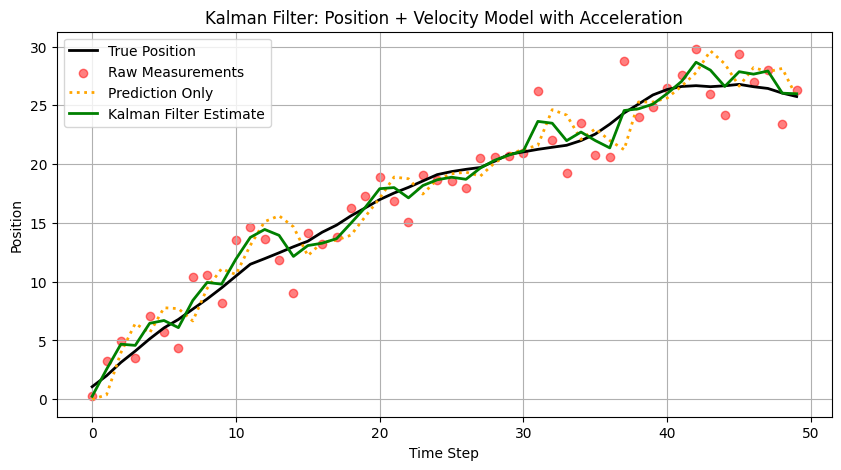

In [22]:
plt.figure(figsize=(10, 5))

plt.plot(true_positions_ext, label="True Position",color = "black", linewidth=2)

plt.scatter(range(n_steps), measurements_ext,
            label="Raw Measurements", color="red", alpha=0.5)

plt.plot(pred_only_positions,
         label="Prediction Only", linestyle = "dotted", linewidth=2, color = "orange")

plt.plot(kf_positions,
         label="Kalman Filter Estimate", linewidth=2, color = "green")

plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Kalman Filter: Position + Velocity Model with Acceleration")
plt.legend()
plt.grid(True)
plt.show()